**Problem Statement:**

Detection and recognition of traffic signs are crucial for the development of self-driving cars, which have a direct impact on driving behaviors.

Self-driving cars use a vehicle-mounted camera to obtain real and practical road traffic information; they can also recognize and understand traffic signs in real- time in road scenes to provide smart vehicles with correct command output and reasonable movement control, which can considerably improve the performance and safety of automatic driving.
So, The CEO of Caltech decides to hire an Analyst who can build a CNN model which Detects and classifies the Traffic signals according to its labels, for his new Self-driving Cars.



**Dataset Description:**

The dataset consists of 43 different classes of images. Classes are as listed below:

0 = Speed limit (20km/h) 
1 = Speed limit (30km/h) 
2 = Speed limit (50km/h) 
3 = Speed limit (60km/h) 
4 = Speed limit (70km/h) 
5 = Speed limit (80km/h)
6 = End of speed limit (80km/h) 
7 = Speed limit (100km/h)
8 = Speed limit (120km/h) 
9 = No passing
10 = No passing for vehicles over 3.5 metric tons 
11 = Right-of-way at the next intersection
12 = Priority road 
13 = Yield
14 = Stop
15 = No vehicles
16 = Vehicles over 3.5 metric tons prohibited 
17 = No entry
18 = General caution
19 = Dangerous curve to the left 
20 = Dangerous curve to the right 
21 = Double curve
22 = Bumpy road 
23 = Slippery road
24 = Road narrows on the right 
25 = Road work
26 = Traffic signals 
27 = Pedestrians
28 = Children crossing 
29 = Bicycles crossing 
30 = Beware of ice/snow
31 = Wild animals crossing
32 = End of all speed and passing limits 
33 = Turn right ahead
34 = Turn left ahead 
35 = Ahead only
36 = Go straight or right 
37 = Go straight or left 
38 = Keep right
39 = Keep left
40 = Roundabout mandatory 
41 = End of no passing
42 = End of no passing by vehicles over 3.5 metric tons


In [ ]:
#IMPORT THE LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import random
import pickle

In [ ]:
#GET THE DATA

!wget https://www.dropbox.com/s/n2wzd6k7t9u6yyx/valid.p

--2023-03-21 03:58:37--  https://www.dropbox.com/s/n2wzd6k7t9u6yyx/valid.p
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/n2wzd6k7t9u6yyx/valid.p [following]
--2023-03-21 03:58:38--  https://www.dropbox.com/s/raw/n2wzd6k7t9u6yyx/valid.p
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc970f8d404aa2ce8dbfe4b39568.dl.dropboxusercontent.com/cd/0/inline/B4q34lV-rRUgGr7HJUGPgajxdiueNNfc6ZvHwHejeDifrwGI72YNcXQR26roQt6f30CnAMr3TrohZZMb_6VD-VEqMkQh-0iHEtd_KgN7Wrk4CpEhCUdSdmY_hBCcrodwIRDX45MouNrbE8vf78zLK4Mzb5u-1WZj8G--doVboAIOiw/file# [following]
--2023-03-21 03:58:38--  https://uc970f8d404aa2ce8dbfe4b39568.dl.dropboxusercontent.com/cd/0/inline/B4q34lV-rRUgGr7HJUGPgajxdiueNNfc6ZvHwHejeDifrwGI72YNcXQR26roQt6f30CnAMr3TrohZZMb_6VD-VEqMkQh-0i

In [ ]:
!wget https://www.dropbox.com/s/5qxezu9azevja57/train.p

--2023-03-21 03:59:00--  https://www.dropbox.com/s/5qxezu9azevja57/train.p
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/5qxezu9azevja57/train.p [following]
--2023-03-21 03:59:00--  https://www.dropbox.com/s/raw/5qxezu9azevja57/train.p
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd80aa2b46b665a9e9b21d3f9f4.dl.dropboxusercontent.com/cd/0/inline/B4q2YWMK6-AAd280K2vNwSbUKR-r4jbiMaE5ZsKowXCybm5xOq_X3tv6vFgUN4CDwbRiZZw62XaOMjxUvxyLIWCZjoAzfjWXfRKhycYoLGjfPJ8-xFsSeQvdEyKFRCimH465wCk2I2qASa7UlZ1LkKJj_zco-uJQHD0FqiNva6mpSQ/file# [following]
--2023-03-21 03:59:01--  https://ucd80aa2b46b665a9e9b21d3f9f4.dl.dropboxusercontent.com/cd/0/inline/B4q2YWMK6-AAd280K2vNwSbUKR-r4jbiMaE5ZsKowXCybm5xOq_X3tv6vFgUN4CDwbRiZZw62XaOMjxUvxyLIWCZjoAzfjW

In [ ]:
!wget https://www.dropbox.com/s/zi7honh03yr85ns/test.p

--2023-03-21 03:59:14--  https://www.dropbox.com/s/zi7honh03yr85ns/test.p
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/zi7honh03yr85ns/test.p [following]
--2023-03-21 03:59:14--  https://www.dropbox.com/s/raw/zi7honh03yr85ns/test.p
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uca59a3197317c40d951b036ae81.dl.dropboxusercontent.com/cd/0/inline/B4qUSVUuIGZjB1Ti6O7Ml2T3pCfYpI8iDfmcBuyUzIDallENu3ns5CzQ6W3ZkOz4RkyEtHuuUIOYV20nswnLwvZShsEhwPQ-p1fZFHntMGwnhU0UBUi03IWrnDV_IwiTS_Fin2nzeHWebgIlGYLTrEPbFthJyjyw_zOnXgtHXyRdzw/file# [following]
--2023-03-21 03:59:14--  https://uca59a3197317c40d951b036ae81.dl.dropboxusercontent.com/cd/0/inline/B4qUSVUuIGZjB1Ti6O7Ml2T3pCfYpI8iDfmcBuyUzIDallENu3ns5CzQ6W3ZkOz4RkyEtHuuUIOYV20nswnLwvZShsEhwPQ-p1

In [ ]:
#LOAD THE DATA AND STORE THEM IN TRAIN, TEST AND VALID VARIABLES
train = pickle.load(open('/content/train.p','rb')) 
test = pickle.load(open('/content/test.p','rb'))
valid = pickle.load(open('/content/valid.p','rb'))


In [ ]:
# segregate the data into features and labels
x_train, y_train= train['features'], train['labels']
x_validation, y_validation= valid['features'], valid['labels'] 
x_test, y_test= test['features'], test['labels']


In [ ]:
# print the shape of data
print(x_train.shape)
print(x_validation.shape) 
print(x_test.shape)


(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


In [ ]:
# print the shape of data
print(y_train.shape)
print(y_validation.shape) 
print(y_test.shape)


(34799,)
(4410,)
(12630,)


35

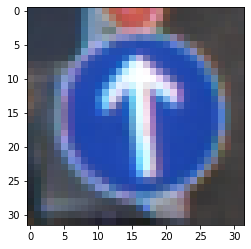

In [ ]:
#VISUALISING SOME IMAGES ALONG WITH THEIR LABLES

i = np.random.randint(1, len(x_train)) 
plt.imshow(x_train[i])
y_train[i]


Here we see label number 35 which means, **'Ahead Only'**

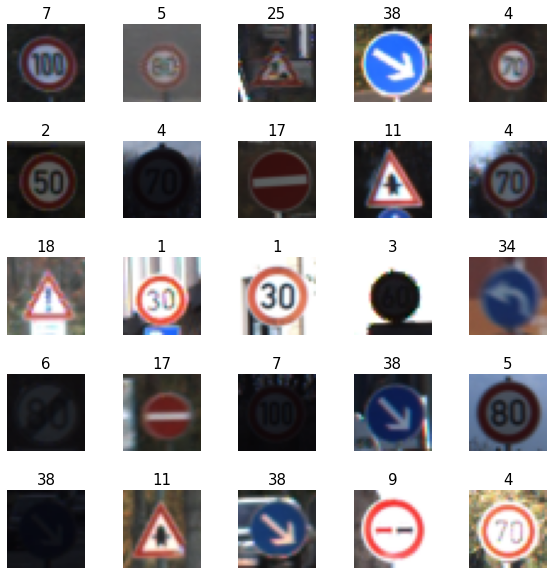

In [ ]:
#SOME MORE IMAGES VISUALISATION

W_grid = 5
L_grid = 5

fig,axes = plt.subplots(L_grid, W_grid, figsize=(10,10))

axes = axes.ravel() #flatten the 5x5 matrix into 25 array

n_training = len(x_train)

for i in np.arange(0,W_grid*L_grid):
  index = np.random.randint(0,n_training)

  axes[i].imshow(x_train[index])
  axes[i].set_title(y_train[index],fontsize=15)
  axes[i].axis('off')

plt.subplots_adjust(hspace=0.5)

In [ ]:
#CONVERTING IMAGE INTO GRAYSCALE

from sklearn.utils import shuffle
x_train,y_train = shuffle(x_train,y_train)

In [ ]:
x_train_grey = np.sum(x_train/3, axis=3, keepdims=True)
x_test_grey = np.sum(x_test/3, axis=3, keepdims=True)
x_valid_grey = np.sum(x_validation/3, axis=3, keepdims=True)

print(x_train_grey.shape)
print(x_test_grey.shape)
print(x_valid_grey.shape)

(34799, 32, 32, 1)
(12630, 32, 32, 1)
(4410, 32, 32, 1)


In [ ]:
#NORMALISE THE GREY-SCALED IMAGES AND VISUALIZE THEM

x_train_grey_norm = (x_train_grey-255)/255
x_test_grey_norm = (x_test_grey-255)/255
x_valid_grey_norm = (x_valid_grey-255)/255

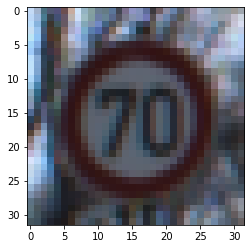

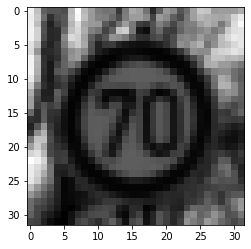

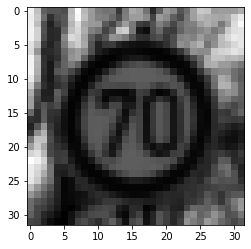

In [ ]:
#Visualise the normalised data

i = random.randint(1, len(x_train_grey))
plt.imshow(x_train[i])
plt.figure()
plt.imshow(x_train_grey[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_train_grey_norm[i].squeeze(), cmap='gray')

Normal Image(Original image) converted into Grey scale and the Grey scale image  is Normalised

In [ ]:
#BUILD CNN MODEL USING SEQUENTIAL

from tensorflow.keras import datasets, layers, models

model=models.Sequential()
model.add(layers.Conv2D(6, (5,5), activation='relu', input_shape=(32,32,1))) #6 neurons with 5*5 filter, relu is used to remove the negative values
model.add(layers.MaxPooling2D()) #MaxPooling2D helps to reduce the size of the data

model.add(layers.Dropout(0.2)) # to deactivate 20% neurons randomly to prevent overfitting

model.add(layers.Conv2D(16, (5,5), activation='relu')) 
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())#Converts multi dimensional array to 1D channel
model.add(layers.Dense(120, activation='relu'))# input layer with 120 neurons
model.add(layers.Dense(84, activation='relu'))# hidden layer with 84 neurons
model.add(layers.Dense(43, activation='softmax'))# output layer with 43 neurons


In [ ]:
#CHECK THE MODEL SUMMARY

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 6)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0

Above summary tells us,

After pooling and dropout functions our input neurons are 400. We have 120 and 84 hidden neurons.
Our output has 43 neurons because we have 43 labels. Total trainable parameters are 64,511


In [ ]:
# COMPLIE THE MODEL
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#FIT THE MODEL

history= model.fit(x_train_grey_norm,
                   y_train,
                   batch_size=500, 
                   epochs=15,
                   verbose=1,
                   validation_data=(x_valid_grey_norm,y_validation))


Epoch 1/15
70/70 [==============================] - 24s 306ms/step - loss: 3.4599 - accuracy: 0.0891 - val_loss: 3.3331 - val_accuracy: 0.1503
Epoch 2/15
70/70 [==============================] - 23s 336ms/step - loss: 2.4770 - accuracy: 0.3452 - val_loss: 1.9414 - val_accuracy: 0.4834
Epoch 3/15
70/70 [==============================] - 21s 302ms/step - loss: 1.4796 - accuracy: 0.5727 - val_loss: 1.3500 - val_accuracy: 0.6236
Epoch 4/15
70/70 [==============================] - 23s 334ms/step - loss: 1.0534 - accuracy: 0.7032 - val_loss: 1.0488 - val_accuracy: 0.7134
Epoch 5/15
70/70 [==============================] - 21s 301ms/step - loss: 0.8172 - accuracy: 0.7747 - val_loss: 0.8579 - val_accuracy: 0.7776
Epoch 6/15
70/70 [==============================] - 23s 332ms/step - loss: 0.6731 - accuracy: 0.8166 - val_loss: 0.7775 - val_accuracy: 0.7959
Epoch 7/15
70/70 [==============================] - 21s 302ms/step - loss: 0.5695 - accuracy: 0.8448 - val_loss: 0.6712 - val_accuracy: 0.8372

The observation we can make is that, 
Training Data Accuracy is 93% &
Validation Data Accuracy is 90%

In [ ]:
score = model.evaluate(x_test_grey_norm, y_test) 
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 6s 14ms/step - loss: 0.6429 - accuracy: 0.8833
Test Accuracy: 0.8832937479019165


Test Data Accuracy is 88%

In [ ]:
#VISUALISE THE LOSS

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
# store the history values into accuracy, val_accuracy, loss and val_loss
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy'] 
loss = history.history['loss']
val_loss = history.history['val_loss']


Text(0.5, 1.0, 'Training and Validation loss')

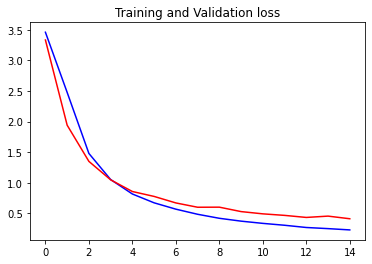

In [ ]:
epochs= range(len(accuracy))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss') 
plt.title('Training and Validation loss')


Text(0.5, 1.0, 'Training and Validation accuracy')

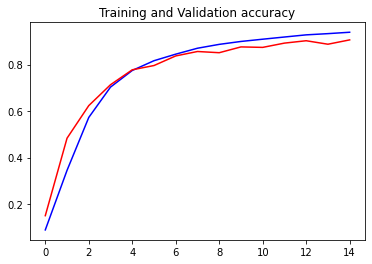

In [ ]:
#VISUALISE Training and Validation Accuracy

epochs= range(len(accuracy))
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')


In [ ]:
from sklearn.metrics import accuracy_score, classification_report 
predicted_classes =np.argmax(model.predict(x_test_grey_norm), axis=-1)
y_true = y_test
print(classification_report(y_test,predicted_classes))
#import pandas as pd
#pd.DataFrame(y_test, predicted_classes)

395/395 [==============================] - 7s 17ms/step
              precision    recall  f1-score   support

           0       0.64      0.60      0.62        60
           1       0.80      0.96      0.87       720
           2       0.87      0.92      0.89       750
           3       0.85      0.92      0.88       450
           4       0.97      0.88      0.92       660
           5       0.81      0.81      0.81       630
           6       0.95      0.74      0.83       150
           7       0.95      0.75      0.83       450
           8       0.87      0.90      0.88       450
           9       0.89      0.97      0.93       480
          10       0.94      0.98      0.96       660
          11       0.88      0.89      0.88       420
          12       0.94      0.92      0.93       690
          13       0.97      0.99      0.98       720
          14       0.95      0.90      0.92       270
          15       0.97      0.95      0.96       210
          16       0.97  

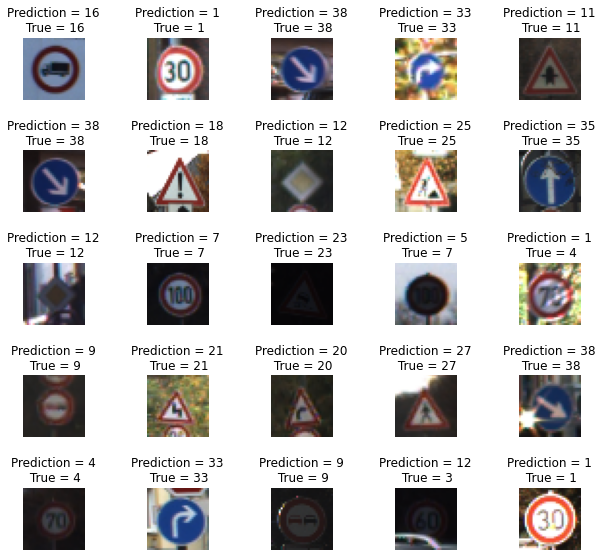

In [ ]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (10,10)) 
axes = axes.ravel()

for i in np.arange(0, L*W):
  axes[i].imshow(x_test[i])
  axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i])) 
  axes[i].axis('off')

plt.subplots_adjust(wspace = 1)


Observation:- 
Here we can observe that out of 25 images, label with numbers 5,1 and 12 are predicted wrongly as 7,4 and 3 respectively

